# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Segmentação de Suicidas</p>

<img src="https://www.tidio.com/wp-content/uploads/Customer-segmentation-min.png">

O objetivo desse notebook é segmentar a base de dados de suicidas extraidas do SUS, referente ao ano de 2023, com vista a identificar padrões que possam gerar possiveis perfis de suicidas.


   <a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">SUMÁRIO</p>   
    
* [1. IMPORTANDO AS BIBLIOTECAS](#1)
    
* [2. CARREGANDO DADOS](#2)
    
* [3. DATA CLEANING](#3)
    
* [4. DATA PREPROCESSING](#4)   
    
* [5. DIMENSIONALITY REDUCTION](#5) 
      
* [6. CLUSTERING](#6)
    
* [7. EVALUATING MODELS](#7)
    
* [8. PROFILING](#8)
    
* [9. CONCLUSION](#9)
    
* [10. END](#10)


<a id="1"></a>
# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">IMPORTANDO AS BIBLIOTECAS</p>

In [1]:
#Importando as bibliotecas
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

<a id="2"></a>
# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">CARREGANDO DADOS</p>

In [2]:
#Carregando a base de dados
data = pd.read_excel("dados_suicidios_préprocessados.xlsx")
print("Quantidade de dados disponiveis:", len(data))
data.head()

Quantidade de dados disponiveis: 32143


,HORAOBITO,NATURAL,CODMUNNATU,IDADE,SEXO,RACACOR,ESTCIV,ESC,ESC2010,SERIESCFAL,OCUP,CODMUNRES,CODMUNOCOR,ASSISTMED,DTATESTADO,CIRCOBITO
0,1100.0,813.0,130260.0,441,1,4.0,9.0,2.0,1.0,NaN,NaN,120040,120040,2.0,2012023.0,2
1,1920.0,812.0,120020.0,419,1,4.0,1.0,3.0,1.0,4.0,NaN,120020,120020,1.0,5012023.0,2
2,1200.0,812.0,120040.0,442,1,4.0,1.0,3.0,2.0,NaN,NaN,120040,120040,9.0,14012023.0,2
3,830.0,812.0,120060.0,461,2,4.0,3.0,3.0,2.0,5.0,999993.0,120040,120040,9.0,18012023.0,2
4,100.0,812.0,120040.0,426,1,4.0,1.0,5.0,5.0,NaN,234624.0,120040,120040,9.0,20012023.0,2


| Coluna        | Tipo     | Tamanho | Descrição                                                                                          |
|---------------|----------|---------|-----------------------------------------------------------------------------------------------------|
| *HORAOBITO*   | Char     | 5       | Hora do óbito (formato 24 h, ex: 00:00)                                                           |
| *NATURAL*     | Char     | 3       | Código de naturalidade: município+UF ou país se estrangeiro :contentReference[oaicite:1]{index=1}                        |
| *CODMUNNATU*  | Char     | 7       | Código do município de naturalidade do falecido :contentReference[oaicite:2]{index=2}                                   |
| *IDADE*       | Char     | 3       | Idade codificada em 3 dígitos: 1º dígito = unidade (1=minuto,2=hora,3=mês,4=ano,5=>100 anos,9=ignorado), próximos dois = quantidade :contentReference[oaicite:3]{index=3} |
| *SEXO*        | Char     | 1       | 1=Masculino · 2=Feminino · 0/9=Ignorado :contentReference[oaicite:4]{index=4}                                     |
| *RACACOR*     | Char     | 1       | 1=Branca · 2=Preta · 3=Amarela · 4=Parda · 5=Indígena :contentReference[oaicite:5]{index=5}                      |
| *ESTCIV*      | Char     | 1       | Situação conjugal: 1=Solteiro · 2=Casado · 3=Viúvo · 4=Separado/judicial · 5=União estável · 9=Ignorado :contentReference[oaicite:6]{index=6} |
| *ESC*         | Char     | 1       | Escolaridade (nível): 0=Sem escolaridade · 1=Fundamental I · 2=Fundamental II · 3=Médio · 4=Superior incompleto · 5=Superior completo · 9=Ignorado :contentReference[oaicite:7]{index=7} |
| *ESC2010*     | Char     | 1       | Escolaridade (alias de ESC acima, conforme classificação 2010) :contentReference[oaicite:8]{index=8}                        |
| *SERIESCFAL*  | Char     | —       | Última série escolar concluída (1 a 8) :contentReference[oaicite:9]{index=9}                                            |
| *OCUP*        | Char     | 6       | Código CBO-2002 da ocupação habitual do falecido (preenchido se idade ≥5 anos) :contentReference[oaicite:10]{index=10}     |
| *CODMUNRES*   | Char     | 7       | Código do município de residência (ou da mãe, em óbito fetal) :contentReference[oaicite:11]{index=11}                       |
| *CODMUNOCOR*  | Char     | 8       | Código do município onde ocorreu o óbito :contentReference[oaicite:12]{index=12}                                          |
| *ASSISTMED*   | Char     | —       | Indicador de assistência médica no óbito (não detalhado nesse trecho)                                   |
| *DTATESTADO*  | Char     | 8       | Data em que o atestado foi assinado (ddmmaaaa) :contentReference[oaicite:13]{index=13}                                      |
| *CIRCOBITO*   | Char     | 1       | Tipo de causa externa: 1=acidente · 2=suicídio · 3=homicídio · 4=outros · 9=ignorado :contentReference[oaicite:14]{index=14} |

**Nessa sessão:** 
* Limpeza de dados
* Engenharia de atributos 

Para entender completamente quais passos devo tomar para limpar o conjunto de dados,
vamos dar uma olhada nas informações presentes nos dados.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32143 entries, 0 to 32142
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   HORAOBITO   26175 non-null  float64
 1   NATURAL     31082 non-null  float64
 2   CODMUNNATU  30880 non-null  float64
 3   IDADE       32143 non-null  int64  
 4   SEXO        32143 non-null  int64  
 5   RACACOR     31883 non-null  float64
 6   ESTCIV      31422 non-null  float64
 7   ESC         30687 non-null  float64
 8   ESC2010     30519 non-null  float64
 9   SERIESCFAL  11255 non-null  float64
 10  OCUP        26746 non-null  float64
 11  CODMUNRES   32143 non-null  int64  
 12  CODMUNOCOR  32143 non-null  int64  
 13  ASSISTMED   26834 non-null  float64
 14  DTATESTADO  32084 non-null  float64
 15  CIRCOBITO   32143 non-null  int64  
dtypes: float64(11), int64(5)
memory usage: 3.9 MB


In [4]:
# Retirando a coluna SERIESCFAL por conter um numero baixo de valores preenchidos
data.drop('SERIESCFAL', inplace=True, axis=1)

In [5]:
data.dropna(inplace=True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17447 entries, 3 to 32142
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   HORAOBITO   17447 non-null  float64
 1   NATURAL     17447 non-null  float64
 2   CODMUNNATU  17447 non-null  float64
 3   IDADE       17447 non-null  int64  
 4   SEXO        17447 non-null  int64  
 5   RACACOR     17447 non-null  float64
 6   ESTCIV      17447 non-null  float64
 7   ESC         17447 non-null  float64
 8   ESC2010     17447 non-null  float64
 9   OCUP        17447 non-null  float64
 10  CODMUNRES   17447 non-null  int64  
 11  CODMUNOCOR  17447 non-null  int64  
 12  ASSISTMED   17447 non-null  float64
 13  DTATESTADO  17447 non-null  float64
 14  CIRCOBITO   17447 non-null  int64  
dtypes: float64(10), int64(5)
memory usage: 2.1 MB


In [7]:
data.describe()

,HORAOBITO,NATURAL,CODMUNNATU,IDADE,SEXO,RACACOR,ESTCIV,ESC,ESC2010,OCUP,CODMUNRES,CODMUNOCOR,ASSISTMED,DTATESTADO,CIRCOBITO
count,17447.000000,17447.000000,17447.000000,17447.000000,17447.000000,17447.000000,17447.000000,17447.000000,17447.000000,17447.000000,17447.000000,17447.000000,17447.000000,1.744700e+04,17447.0
mean,1214.036854,833.277068,334282.724709,441.867312,1.234596,2.467301,2.084656,4.150169,3.152748,659825.677767,341437.512581,341720.405972,2.324812,1.584274e+07,2.0
std,632.901804,10.207423,102171.790554,17.083995,0.423758,1.474634,1.805484,1.939509,2.361441,269638.257661,106370.200029,106437.721994,1.960932,8.709242e+06,0.0
min,0.000000,800.000000,110001.000000,410.000000,1.000000,1.000000,1.000000,1.000000,0.000000,10205.000000,110002.000000,110002.000000,1.000000,1.012023e+06,2.0
25%,735.000000,826.000000,260940.000000,428.000000,1.000000,1.000000,1.000000,3.000000,2.000000,512105.000000,270430.000000,270440.000000,2.000000,8.102023e+06,2.0
50%,1200.000000,835.000000,350400.000000,440.000000,1.000000,2.000000,1.000000,4.000000,3.000000,622020.000000,351870.000000,351860.000000,2.000000,1.605202e+07,2.0
75%,1730.000000,841.000000,412280.000000,454.000000,1.000000,4.000000,2.000000,4.000000,3.000000,998999.000000,420355.000000,420395.000000,2.000000,2.309202e+07,2.0
max,2359.000000,853.000000,530010.000000,506.000000,2.000000,5.000000,9.000000,9.000000,9.000000,999995.000000,530010.000000,530010.000000,9.000000,3.112202e+07,2.0


# Parte de feature engenieering

## Ajustando o feature DATAHORA para classes conforme abaixo:
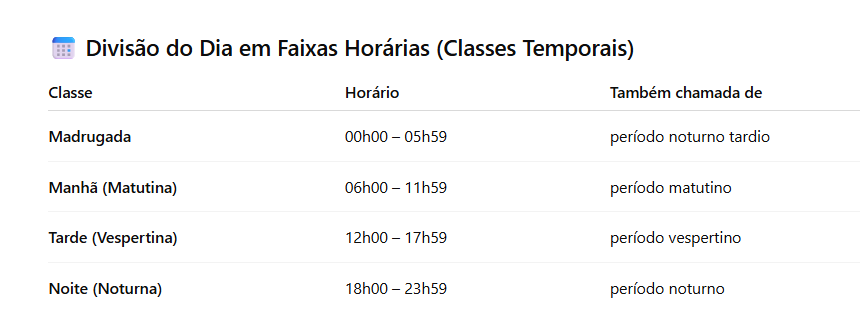

# Lição de casa, fazer o feature engenieering acima descrito, utilizando esses 3 metodos: https://chatgpt.com/share/688646d9-8860-800a-8296-f518910860ab


In [ ]:
if data['HORA'] >= 0 and data['HORA'] < 6:
    data['PERIODO'] = 'Madrugada'
elif data['HORA'] >= 6 and data['HORA'] < 12:
    data['PERIODO'] = 'Manhã'
elif data['HORA'] >= 12 and data['HORA'] < 18:
    data['PERIODO'] = 'Tarde'
else:
    data['PERIODO'] = 'Noite'

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [8]:
data.columns

Index(['HORAOBITO', 'NATURAL', 'CODMUNNATU', 'IDADE', 'SEXO', 'RACACOR',
       'ESTCIV', 'ESC', 'ESC2010', 'OCUP', 'CODMUNRES', 'CODMUNOCOR',
       'ASSISTMED', 'DTATESTADO', 'CIRCOBITO'],
      dtype='object')

In [13]:
# Tratando o tipo dos dados, para que fique com o zero a [esquerda], e extrai a hora cmo
data['HORAOBITO'] = data['HORAOBITO'].astype('int64')
data['HORAOBITO'] = data['HORAOBITO'].astype(str).str.zfill(4)
data['HORA'] = data['HORAOBITO'].str[:2].astype('int64')

In [16]:
if data['HORA'] >= 0 and data['HORA'] < 6:
    data['PERIODO'] = 'Madrugada'
elif data['HORA'] >= 6 and data['HORA'] < 12:
    data['PERIODO'] = 'Manhã'
elif data['HORA'] >= 12 and data['HORA'] < 18:
    data['PERIODO'] = 'Tarde'
else:
    data['PERIODO'] = 'Noite'

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [14]:
data['HORA']

3         8
4         1
5         5
6        21
11       21
         ..
32136    19
32137     1
32138     9
32140    14
32142     0
Name: HORA, Length: 17447, dtype: int64